### Analisis Runtun Waktu pada Curah Hujan Kota Semarang ###

Import package yang dibutuhkan

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib
from scipy.stats import boxcox

matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'

Import file yang berisi data curah hujan

In [2]:
data = pd.read_csv('curah hujan.csv')

Menyatukan data curah hujan menjadi satu kolom

In [3]:
data= pd.Series(data.values.ravel('F'))

In [4]:
data.head()

0    404
1    342
2    306
3    227
4     91
dtype: int64

In [5]:
data.dtypes

dtype('int64')

In [6]:
data.shape

(384,)

Membuat dataframe dari data

In [7]:
data1=pd.DataFrame(data=data,columns=['curah hujan'])
data1.head()

,curah hujan
0,404
1,342
2,306
3,227
4,91


Membuat isian data yaitu bulan-tahun

In [8]:
date1 = "1984-01"
date2 = "2015-12"

y0 = int( date1.split('-')[0] ) # 1984
y1 = int( date2.split('-')[0] ) # 2015

m0 = int( date1.split('-')[1] ) - 1 # 10-1 --> 9 because will be used for indexing
m1 = int( date2.split('-')[1] ) - 1 # 01-1 --> 0 because will be used for indexing

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
result = []
start = m0
for y in range(y0, y1+1):
    for m in range(start,12):
        result.append( str( months[m  % 12])+'-'+str(y) )
        if y == y1 and (m % 12) == m1:
            break
    start = 0

print (result)

['Jan-1984', 'Feb-1984', 'Mar-1984', 'Apr-1984', 'May-1984', 'Jun-1984', 'Jul-1984', 'Aug-1984', 'Sep-1984', 'Oct-1984', 'Nov-1984', 'Dec-1984', 'Jan-1985', 'Feb-1985', 'Mar-1985', 'Apr-1985', 'May-1985', 'Jun-1985', 'Jul-1985', 'Aug-1985', 'Sep-1985', 'Oct-1985', 'Nov-1985', 'Dec-1985', 'Jan-1986', 'Feb-1986', 'Mar-1986', 'Apr-1986', 'May-1986', 'Jun-1986', 'Jul-1986', 'Aug-1986', 'Sep-1986', 'Oct-1986', 'Nov-1986', 'Dec-1986', 'Jan-1987', 'Feb-1987', 'Mar-1987', 'Apr-1987', 'May-1987', 'Jun-1987', 'Jul-1987', 'Aug-1987', 'Sep-1987', 'Oct-1987', 'Nov-1987', 'Dec-1987', 'Jan-1988', 'Feb-1988', 'Mar-1988', 'Apr-1988', 'May-1988', 'Jun-1988', 'Jul-1988', 'Aug-1988', 'Sep-1988', 'Oct-1988', 'Nov-1988', 'Dec-1988', 'Jan-1989', 'Feb-1989', 'Mar-1989', 'Apr-1989', 'May-1989', 'Jun-1989', 'Jul-1989', 'Aug-1989', 'Sep-1989', 'Oct-1989', 'Nov-1989', 'Dec-1989', 'Jan-1990', 'Feb-1990', 'Mar-1990', 'Apr-1990', 'May-1990', 'Jun-1990', 'Jul-1990', 'Aug-1990', 'Sep-1990', 'Oct-1990', 'Nov-1990', 'De

In [9]:
data2=pd.DataFrame(data=result,columns=['tanggal'])
data2.head()

,tanggal
0,Jan-1984
1,Feb-1984
2,Mar-1984
3,Apr-1984
4,May-1984


Menyatukan data1 dan data2 menjadi satu dataframe

In [10]:
data3=pd.concat([data2, data1],axis=1)

In [11]:
data3.dtypes

tanggal        object
curah hujan     int64
dtype: object

In [12]:
data3['tanggal']=pd.to_datetime(data3['tanggal'])
data3.head()

,tanggal,curah hujan
0,1984-01-01,404
1,1984-02-01,342
2,1984-03-01,306
3,1984-04-01,227
4,1984-05-01,91


In [13]:
data4=data3.set_index('tanggal')
data4.head()

,curah hujan
tanggal,
1984-01-01,404
1984-02-01,342
1984-03-01,306
1984-04-01,227
1984-05-01,91


Split data menjadi data training dan data testing

In [14]:
trainingSet=data4.iloc[:300,]
testSet=data4.iloc[300:,]
trainingSet.tail()

,curah hujan
tanggal,
2008-08-01,81
2008-09-01,70
2008-10-01,114
2008-11-01,304
2008-12-01,353


In [15]:
trainingSet.shape

(300, 1)

In [16]:
testSet.head()

,curah hujan
tanggal,
2009-01-01,225
2009-02-01,552
2009-03-01,75
2009-04-01,243
2009-05-01,354


In [17]:
tsTraining = trainingSet['curah hujan']
tsTraining.tail(10)

tanggal
2008-03-01    227
2008-04-01     85
2008-05-01     55
2008-06-01     58
2008-07-01      2
2008-08-01     81
2008-09-01     70
2008-10-01    114
2008-11-01    304
2008-12-01    353
Name: curah hujan, dtype: int64

In [18]:
tsTesting = testSet['curah hujan']
tsTesting['2009':]

tanggal
2009-01-01    225
2009-02-01    552
2009-03-01     75
2009-04-01    243
2009-05-01    354
             ... 
2015-08-01      6
2015-09-01      1
2015-10-01      0
2015-11-01    280
2015-12-01    209
Name: curah hujan, Length: 84, dtype: int64

membuat plot dari data training

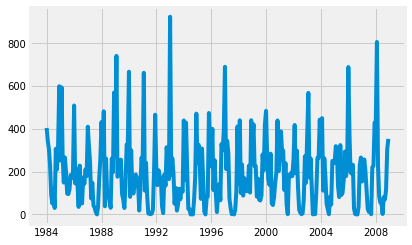

In [19]:
plt.plot(tsTraining)

Visualisasi data dengan metode dekomposisi, akan menguraikan data time series menjadi tiga komponen, yaitu tren, musim, dan noise.

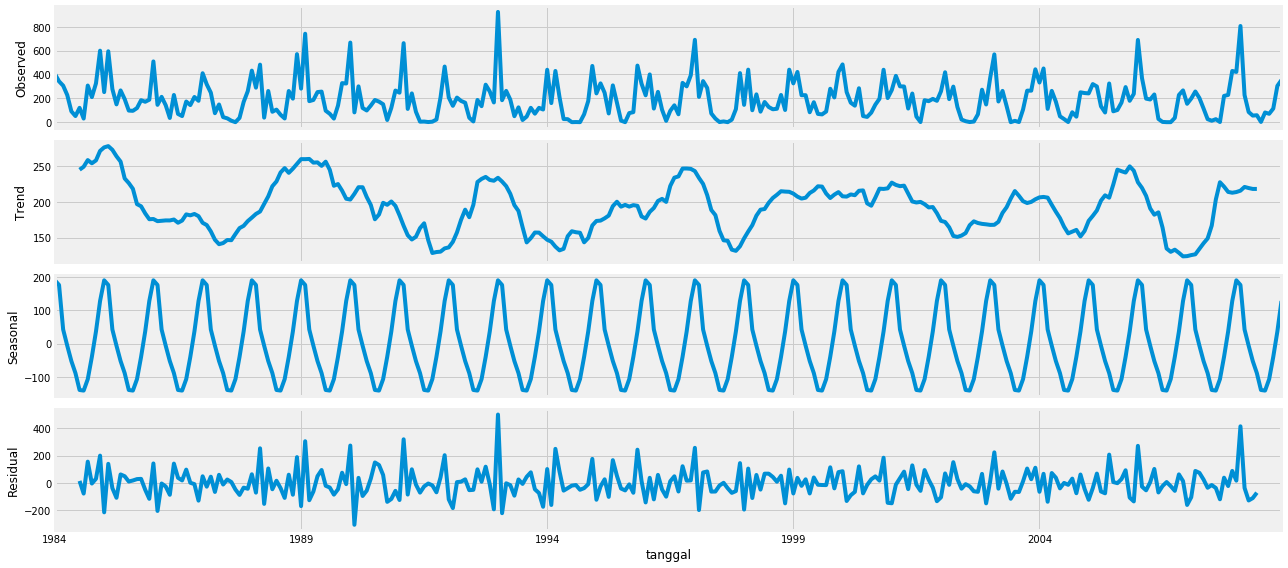

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(tsTraining, model='additive')
fig = decomposition.plot()
plt.show()

Mengeliminasi data dengan nilai nol

In [21]:
post_training=tsTraining[tsTraining > 0]

Melakukan Box-Cox Transformastion

In [22]:
bc_training, lam = boxcox(post_training)

lam

0.44719566662733545

Melakukan transformasi pada data training, dengan menggunakan transformasi square-root, karena didapatkan nilai lambda 0.447 ~ 0.5

In [23]:
ts_sqrt = np.sqrt(tsTraining)

Membuat fungsi untuk menguji stasioneritas data

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

Melakukan tes stasioner pada data yang telah ditransformasi

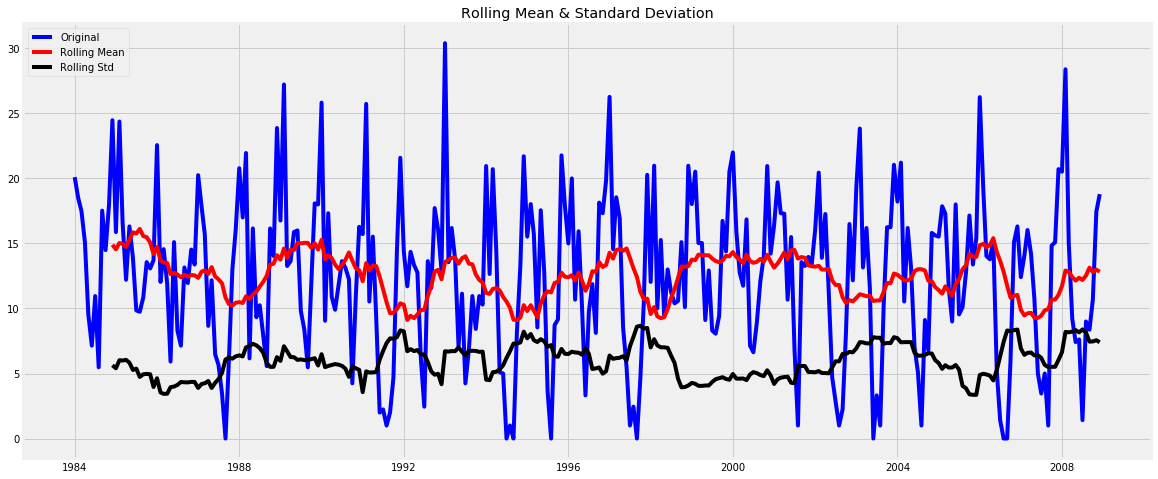

Results of Dickey-Fuller Test:
Test Statistic                  -5.002698
p-value                          0.000022
#Lags Used                      16.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64


In [25]:
test_stationarity(ts_sqrt)

Proses pencarian model yang terbaik

In [26]:
import pmdarima as pm

smodel2 = pm.auto_arima(ts_sqrt, start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=2, m=12,
                         start_P=0, seasonal=True,
                         d=1,max_d=2, max_D=2, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel2.summary()

C:\Users\akuaa\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\akuaa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1842.427, BIC=1853.406, Fit time=2.531 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2036.683, BIC=2044.002, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1828.779, BIC=1843.417, Fit time=0.922 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1681.842, BIC=1696.480, Fit time=4.000 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1677.073, BIC=1695.371, Fit time=2.812 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1782.346, BIC=1796.984, Fit time=0.891 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1676.533, BIC=1698.490, Fit time=13.943 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1679.765, BIC=1705.381, Fit time=13.932 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=1840.072, BIC=1858.369, Fit time=9.781 seconds
Fit ARIMA: order=(0, 1, 2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  300
Model:             SARIMAX(0, 1, 1)x(0, 1, 2, 12)   Log Likelihood                -832.852
Date:                            Tue, 12 Nov 2019   AIC                           1675.704
Time:                                    21:08:57   BIC                           1694.001
Sample:                                         0   HQIC                          1683.037
                                            - 300                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.004      0.360      0.719      -0.006       0.009
ma.L1         -0.8998      0.029    -30.971      0.000      -0.957      -0.843
ma.S.L12      -1.1282      0.066    -17.190      0.000      -1.257      -1.000
ma.S.L24       0.1967      0.060      3.292      0.001       0.080       0.314
sigma2        17.5149      1.846      9.489      0.000      13.897      21.133
===================================================================================
Ljung-Box (Q):                       37.42   Jarque-Bera (JB):                 4.38
Prob(Q):                              0.59   Prob(JB):                         0.11
Heteroskedasticity (H):               0.80   Skew:                             0.03
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Karena intercept di model sebelumnya tidak signifikan, maka dilakukan pencarian kembali model yang terbaik, namun tanpa intercept

In [27]:
import pmdarima as pm

smodel2_1 = pm.auto_arima(ts_sqrt, start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=2, m=12,
                         start_P=0, seasonal=True,
                         d=1,max_d=2, max_D=2, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True, with_intercept=False)

smodel2_1.summary()

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1840.429, BIC=1847.748, Fit time=1.531 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2034.683, BIC=2038.342, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1826.780, BIC=1837.759, Fit time=0.266 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1679.986, BIC=1690.965, Fit time=1.875 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1675.230, BIC=1689.868, Fit time=1.172 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1780.387, BIC=1791.365, Fit time=0.297 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1674.658, BIC=1692.956, Fit time=8.531 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1676.541, BIC=1698.498, Fit time=7.500 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=1838.073, BIC=1852.711, Fit time=7.531 seconds
Fit ARIMA: order=(0, 1, 2) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  300
Model:             SARIMAX(0, 1, 1)x(0, 1, 2, 12)   Log Likelihood                -832.925
Date:                            Tue, 12 Nov 2019   AIC                           1673.850
Time:                                    21:11:05   BIC                           1688.487
Sample:                                         0   HQIC                          1679.716
                                            - 300                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8974      0.029    -30.541      0.000      -0.955      -0.840
ma.S.L12      -1.1277      0.065    -17.306      0.000      -1.255      -1.000
ma.S.L24       0.1969      0.059      3.351      0.001       0.082       0.312
sigma2        17.5341      1.843      9.513      0.000      13.922      21.147
===================================================================================
Ljung-Box (Q):                       37.56   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.58   Prob(JB):                         0.11
Heteroskedasticity (H):               0.79   Skew:                             0.03
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
mod2 = sm.tsa.statespace.SARIMAX(ts_sqrt,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod2.fit()

C:\Users\akuaa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Meingidentifikasi residual model sarima

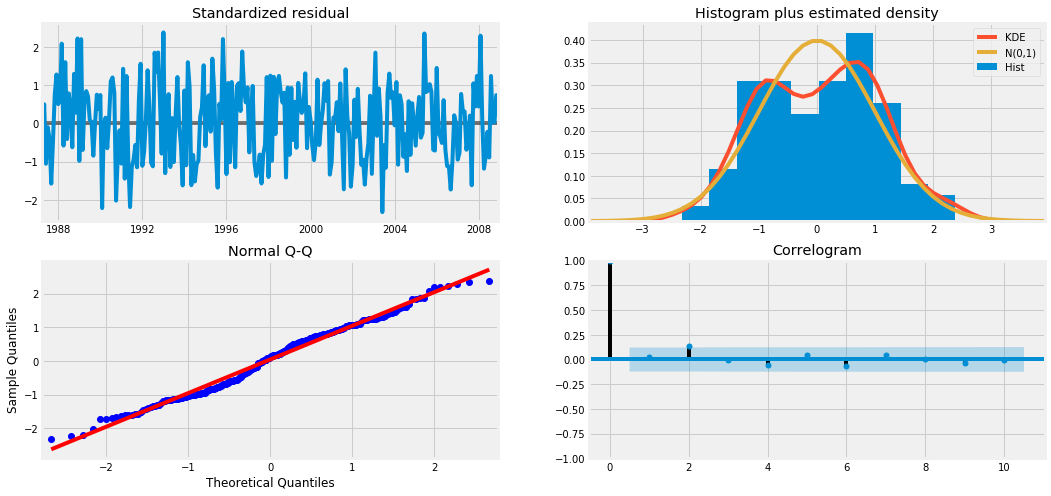

In [29]:
results2.plot_diagnostics(figsize=(16,8))
plt.show()

Melakukan prediksi pada data testing, kemudian dibandingkan dengan data sebenarnya pada data testing

In [30]:
pred2 = results2.get_prediction(pd.to_datetime('2009-01-01'), pd.to_datetime('2015-12-01'), dynamic=False)
pred_ci2 = pred2.conf_int()

In [31]:
pred2_1=pred2.predicted_mean
pred2_2=pred2_1**2

In [32]:
pred_ci2_1=pred_ci2**2

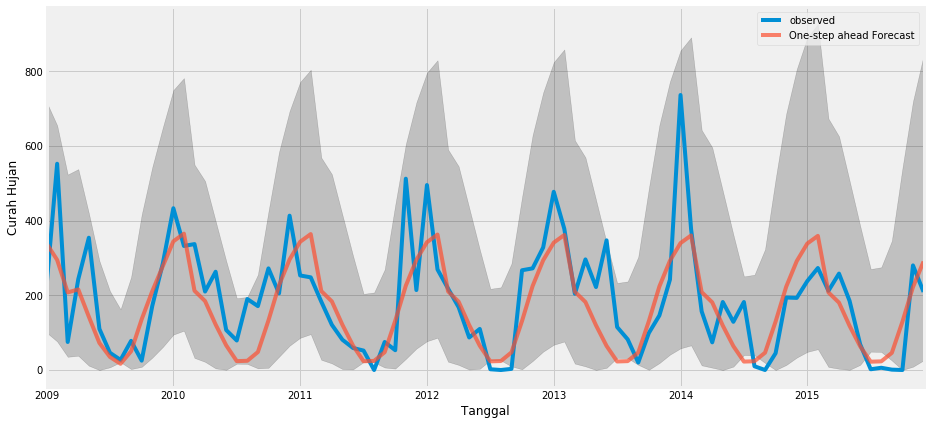

In [33]:
ax = tsTesting['2009':].plot(label='observed')
pred2_2.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci2_1.index,
                pred_ci2_1.iloc[:, 0],
                pred_ci2_1.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Curah Hujan')
plt.legend()
plt.show()

Mencari MSE pada model

In [34]:
ts_forecasted = pred2_2
ts_truth = tsTesting['2009-01-01':]
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10673.63


Menampilkan RMSE pada model

In [35]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 103.31


Melakukan forecast sebanyak 150 bulan ke depan, dari bulan Januari 2009

In [36]:
pred_uc2 = results2.get_forecast(steps=150)
pred_ci2 = pred_uc2.conf_int()

In [37]:
pred_uc2_1=pred_uc2.predicted_mean
pred_uc2_2=pred_uc2_1**2

In [38]:
pred_ci2_1=pred_ci2**2

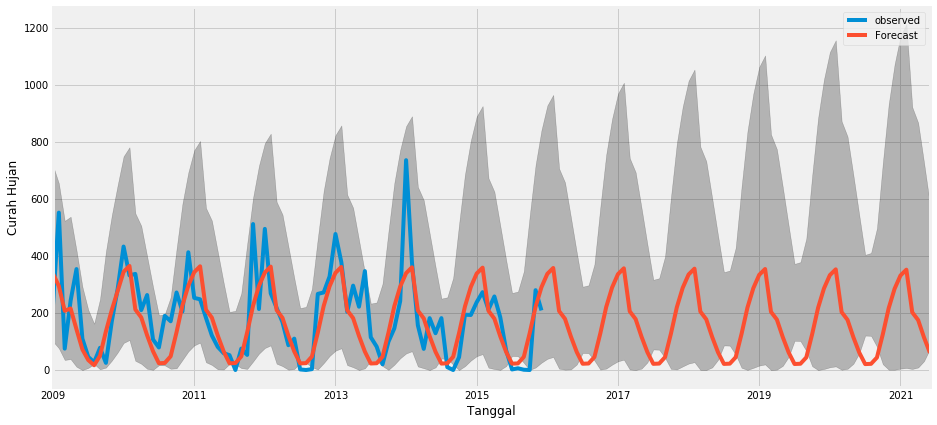

In [39]:
ax = tsTesting.plot(label='observed', figsize=(14, 7))
pred_uc2_2.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci2_1.index,
                pred_ci2_1.iloc[:, 0],
                pred_ci2_1.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Curah Hujan')
plt.legend()
plt.show()